# Logistic Regression, Random Forest

In [ ]:
import pandas as pd

data = pd.read_csv("dataset_ready_for_models.csv")

In [ ]:
data['is_sarcastic'].value_counts()

is_sarcastic
1    5378
0    5378
Name: count, dtype: int64

In [ ]:
data.isnull().any()

Unnamed: 0.1         False
Unnamed: 0           False
is_sarcastic         False
text                 False
source               False
text_mod             False
tokenized            False
tokenized_cleaned    False
lemmatized           False
dtype: bool

In [ ]:
data=data.sample(frac=1, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['is_sarcastic'])

In [ ]:
print(train.shape)
print(test.shape)

(8604, 9)
(2152, 9)


In [ ]:
print(train['is_sarcastic'].value_counts())
print(test['is_sarcastic'].value_counts())

is_sarcastic
1    4302
0    4302
Name: count, dtype: int64
is_sarcastic
1    1076
0    1076
Name: count, dtype: int64


In [ ]:
train.to_csv("train_ready_for_models.csv")
test.to_csv("test_ready_for_models.csv")

In [ ]:
import ast
train['lemmatized'] = train['lemmatized'].apply(ast.literal_eval)
test['lemmatized'] = test['lemmatized'].apply(ast.literal_eval)

In [ ]:
X_train = train['lemmatized']
X_test = test['lemmatized']
y_train = train['is_sarcastic']
y_test = test['is_sarcastic']

In [ ]:
def identity_tokenizer(text):
    """
    A tokenizer function that returns the input text unchanged.

    Parameters:
    text (str): The input text.

    Returns:
    str: The input text unchanged.
    """
    return text

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf(X_train, X_test):
    """
    Calculate TF-IDF (Term Frequency-Inverse Document Frequency) vectors for training and test data.

    Args:
    X_train (list or array-like): Training data.
    X_test (list or array-like): Test data.

    Returns:
    tuple: Tuple containing TF-IDF vectors for training and test data.
    """
    tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, token_pattern=None, ngram_range=(1,3), min_df=1)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf

In [ ]:
X_train_tfidf, X_test_tfidf = calculate_tfidf(X_train, X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    """
    Train the classifier, make predictions, and print classification report.

    Args:
    classifier: Classifier object (e.g., LogisticRegression, RandomForestClassifier).
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.

    Returns:
    None
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred), end="\n\n")

    return y_pred

# Create classifiers
lr_classifier_default = LogisticRegression()
rf_classifier_default = RandomForestClassifier()

# Train and evaluate Logistic Regression classifier
print("Logistic Regression Classifier:")
y_pred_lr = train_and_evaluate(lr_classifier_default, X_train_tfidf, y_train, X_test_tfidf, y_test)

# Train and evaluate RandomForestClassifier
print("Random Forest Classifier:")
y_pred_rf = train_and_evaluate(rf_classifier_default, X_train_tfidf, y_train, X_test_tfidf, y_test)

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67      1076
           1       0.67      0.74      0.70      1076

    accuracy                           0.68      2152
   macro avg       0.68      0.68      0.68      2152
weighted avg       0.68      0.68      0.68      2152


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1076
           1       0.77      0.47      0.59      1076

    accuracy                           0.67      2152
   macro avg       0.70      0.67      0.65      2152
weighted avg       0.70      0.67      0.65      2152




In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_and_evaluate(classifier, param_grid, X_train, y_train, X_test, y_test):
    """
    Perform grid search hyperparameter tuning, train the classifier, make predictions, and print classification report.

    Args:
    classifier: Classifier object.
    param_grid (dict): Parameter grid for hyperparameter tuning.
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.

    Returns:
    None
    """
    # Initialize GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_macro')

    # Fit the GridSearchCV on training data
    grid_search.fit(X_train, y_train)

    # Best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred), end='\n\n')

# Define parameter grid for Logistic Regression
lr_param_grid = {
    'solver': ['saga', ],
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 2000]
}

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create and evaluate Logistic Regression classifier
print("Logistic Regression Classifier:")
grid_search_and_evaluate(LogisticRegression(), lr_param_grid, X_train_tfidf, y_train, X_test_tfidf, y_test)

# Create and evaluate Random Forest classifier
print("Random Forest Classifier:")
grid_search_and_evaluate(RandomForestClassifier(), rf_param_grid, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create classifiers with best parameters
lr_classifier_param = LogisticRegression(C=10, max_iter=2000,  penalty='l2', solver='saga')
rf_classifier_param = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200)

# Train and evaluate Logistic Regression classifier
print("Logistic Regression Classifier with the BEST Parameters:")
y_pred_lr_param = train_and_evaluate(lr_classifier_param, X_train_tfidf, y_train, X_test_tfidf, y_test)

# Train and evaluate RandomForestClassifier
print("Random Forest Classifier with the BEST Parameters:")
y_pred_rf_param = train_and_evaluate(rf_classifier_param, X_train_tfidf, y_train, X_test_tfidf, y_test)

Logistic Regression Classifier with the BEST Parameters:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67      1076
           1       0.67      0.73      0.70      1076

    accuracy                           0.68      2152
   macro avg       0.68      0.68      0.68      2152
weighted avg       0.68      0.68      0.68      2152


Random Forest Classifier with the BEST Parameters:
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1076
           1       0.76      0.56      0.64      1076

    accuracy                           0.69      2152
   macro avg       0.70      0.69      0.68      2152
weighted avg       0.70      0.69      0.68      2152




In [ ]:
# import pandas as pd
# import numpy as np

# def get_misclassified_df(y_true, y_pred, X_test_texts):
#     misclassified_indices = np.where(y_true != y_pred)[0]

#     misclassified_data = []

#     for index, text in zip(misclassified_indices, X_test_texts.iloc[misclassified_indices]):
#         true_label = y_true.iloc[index]
#         predicted_label = y_pred[index]

#         misclassified_data.append({'True Label': true_label,
#                                    'Predicted Label': predicted_label,
#                                    'Text': text})

#     # Convert the list of dictionaries into a DataFrame
#     misclassified_df = pd.DataFrame(misclassified_data)

#     return misclassified_df

In [ ]:
# y_pred_rf_param = []

# with open("/content/y_pred_rf_param.txt", "r") as file:
#   for line in file.readlines():
#     y_pred_rf_param.append(int(line.split('.')[0]))

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_confusion_matrix(y_true, y_pred, title):
#     conf_matrix = confusion_matrix(y_true, y_pred)

#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Не сарказм', 'Сарказм'], yticklabels=['Не сарказм', 'Сарказм'])
#     plt.xlabel('Передбачені мітки')
#     plt.ylabel('Справжні мітки')
#     plt.title(title)
#     plt.show()

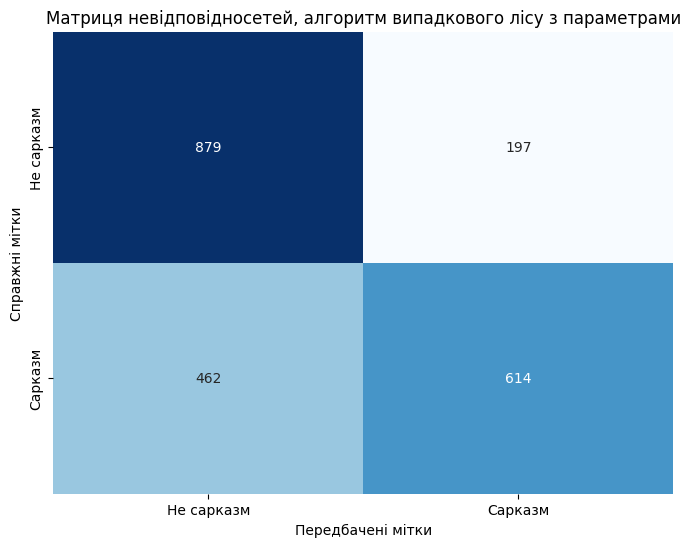

In [ ]:
# plot_confusion_matrix(y_test, y_pred_rf_param, 'Матриця невідповідносетей, алгоритм випадкового лісу з параметрами')

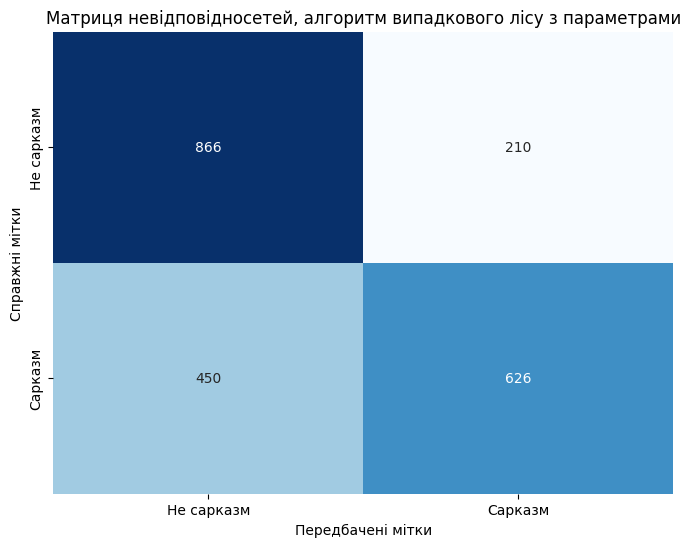

In [ ]:
# plot_confusion_matrix(y_test, y_pred_rf_best, 'Матриця невідповідносетей, алгоритм випадкового лісу з параметрами')

# Experiment with synthetic data

In [ ]:
import pandas as pd

synth_openai = pd.read_csv("/content/synth_openai_sarc_and_not.csv", usecols=['is_sarcastic', 'lemmatized'])

In [ ]:
synth_openai['is_sarcastic'].value_counts()

is_sarcastic
0    2554
1    2554
Name: count, dtype: int64

In [ ]:
synth_openai = synth_openai.sample(frac=1, random_state=42)

In [ ]:
X_train_synth = pd.concat([train[['lemmatized']], synth_openai[['lemmatized']]])['lemmatized']
y_train_synth = pd.concat([train[['is_sarcastic']], synth_openai[['is_sarcastic']]])['is_sarcastic']

In [ ]:
X_train_tfidf_synth, X_test_tfidf = calculate_tfidf(X_train_synth, X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

lr_classifier_param = LogisticRegression()
rf_classifier_param = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200)

print("Logistic Regression Classifier with the BEST Previous Performance. Trial with Synthetic Data:")
y_pred_lr_synth = train_and_evaluate(lr_classifier_param, X_train_tfidf_synth, y_train_synth, X_test_tfidf, y_test)

print("Random Forest Classifier with the BEST Previous Performance. Trial with Synthetic Data:")
y_pred_rf_synth = train_and_evaluate(rf_classifier_param, X_train_tfidf_synth, y_train_synth, X_test_tfidf, y_test)

Logistic Regression Classifier with the BEST Previous Performance. Trial with Synthetic Data:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1076
           1       0.66      0.76      0.70      1076

    accuracy                           0.68      2152
   macro avg       0.69      0.68      0.68      2152
weighted avg       0.69      0.68      0.68      2152


Random Forest Classifier with the BEST Previous Performance. Trial with Synthetic Data:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1076
           1       0.75      0.57      0.65      1076

    accuracy                           0.69      2152
   macro avg       0.70      0.69      0.69      2152
weighted avg       0.70      0.69      0.69      2152


